<a href="https://colab.research.google.com/github/OluwoleDove/Doctor_Akinsulie_Research_Metaanalysis/blob/main/Rabies_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAIN VISUALIZAION**

## **IMPORTING MODULES**

In [45]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors

## **FIRST CHART**

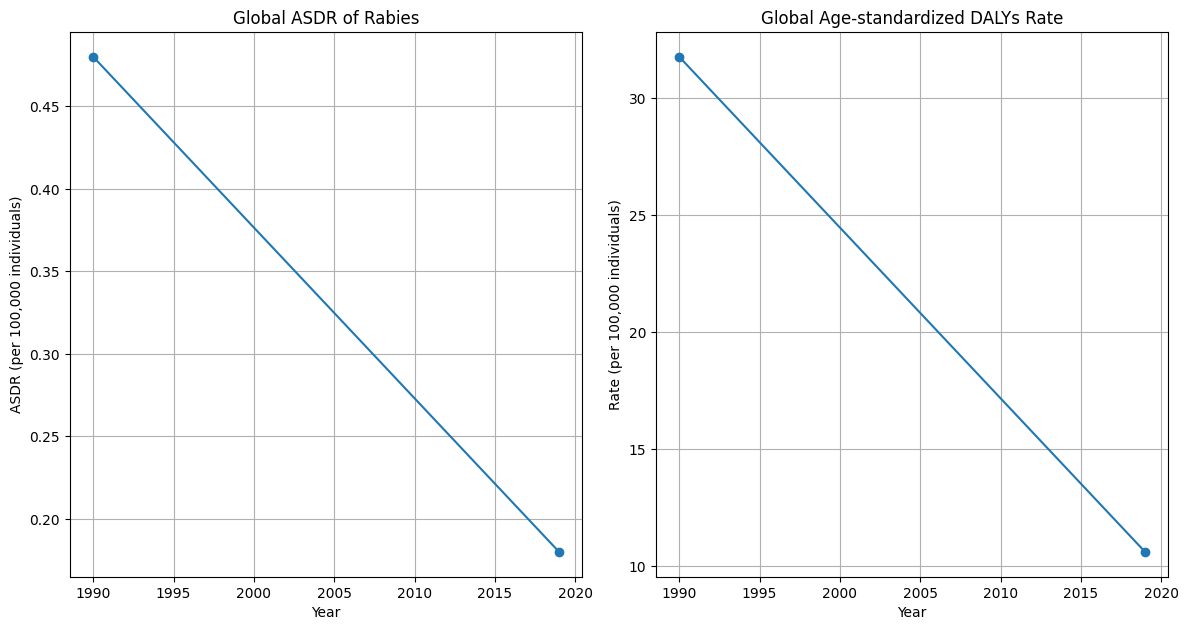

In [46]:
# Data
years = [1990, 2019]
global_ASDR_rabies = [0.48, 0.18]
global_ASDR_rate = [31.77, 10.59]

# Plotting
plt.figure(figsize=(12, 12))

# Global ASDR of Rabies
plt.subplot(2, 2, 1)
plt.plot(years, global_ASDR_rabies, marker='o')
plt.title('Global ASDR of Rabies')
plt.xlabel('Year')
plt.ylabel('ASDR (per 100,000 individuals)')
plt.grid(True)

# Global Age-standardized DALYs Rate
plt.subplot(2, 2, 2)
plt.plot(years, global_ASDR_rate, marker='o')
plt.title('Global Age-standardized DALYs Rate')
plt.xlabel('Year')
plt.ylabel('Rate (per 100,000 individuals)')
plt.grid(True)

plt.tight_layout()
plt.show()


## **SECOND CHART**

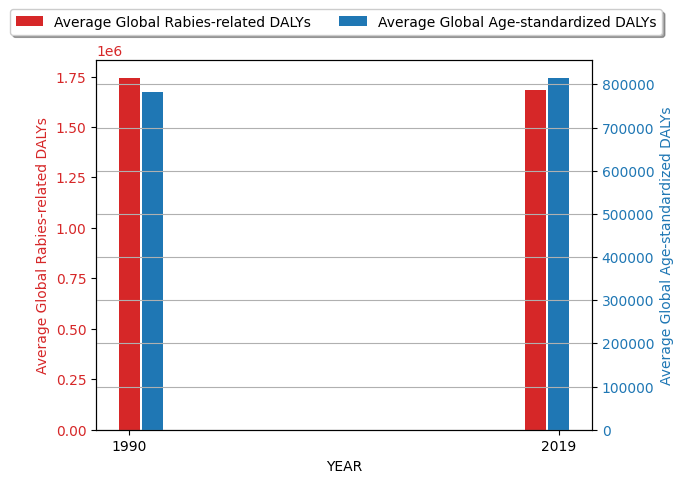

In [47]:
# World population data for 1990 and 2019 (in billions)
world_population_1990 = 5.3 * 10**9
world_population_2019 = 7.7 * 10**9

years = [1990, 2019]
rabies_dalys = [1744232.42, 782052.30]

# Global age-standardized DALYs rate
age_standardized_rate = [31.77, 10.59]


rabies_dalys_1990 = rabies_dalys[0]
rabies_dalys_2019 = rabies_dalys[1]
age_standardized_1990 = age_standardized_rate[0] * (world_population_1990 / 100000)
age_standardized_2019 = age_standardized_rate[1] * (world_population_2019 / 100000)

# Plotting
fig, ax1 = plt.subplots()

bar_width = 1.5
space_width = 0.2
positions_1990 = [year - bar_width / 2 - space_width / 2 for year in years]
positions_2019 = [year + bar_width / 2 + space_width / 2 for year in years]

# Plot Global rabies-related DALYs
color = 'tab:red'
ax1.set_xlabel('YEAR')
ax1.set_ylabel('Average Global Rabies-related DALYs', color=color)
ax1.bar(positions_1990, [rabies_dalys_1990, age_standardized_1990], color=color, width=bar_width, label='Average Global Rabies-related DALYs')
ax1.tick_params(axis='y', labelcolor=color)

# Plot Global age-standardized DALYs rate
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Global Age-standardized DALYs', color=color)
ax2.bar(positions_2019, [rabies_dalys_2019, age_standardized_2019], color=color, width=bar_width, label='Average Global Age-standardized DALYs')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
ax1.set_xticks([positions_1990[0], positions_2019[1]])
ax1.set_xticklabels(['1990', '2019'])
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), shadow=True, ncol=2)
plt.grid(True)

plt.show()


## **THIRD CHART**

<ipython-input-48-266d93629b54>:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


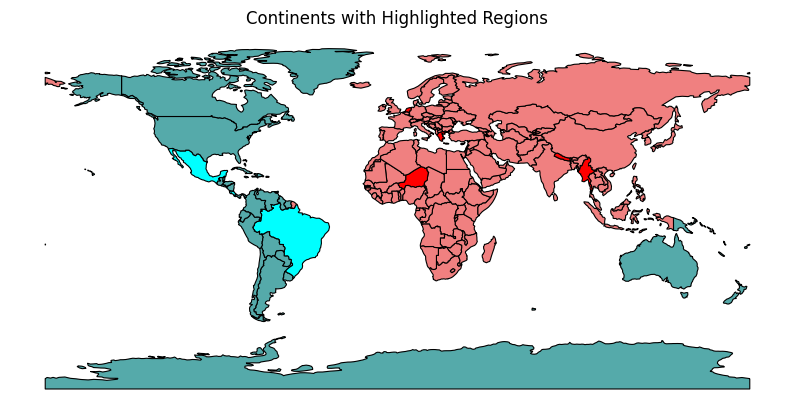

In [48]:
# Data for EAPC of Rabies ASIR (%) (ignore for this version)
eapc_data = {
  'Country': ['Netherlands', 'Puerto Rico', 'Greece', 'Mexico', 'Costa Rica', 'Brazil',  'Nepal', 'Myanmar', 'Niger'],
  'EAPC': [5.19, 2.75, 2.23, -1.00, -0.99, -0.99]
}

# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Define countries with reducing rabies
reducing_rabies = ['Mexico', 'Costa Rica', 'Brazil']

# Define affected countries
affected_countries = ['Netherlands', 'Puerto Rico', 'Greece',  'Nepal', 'Myanmar', 'Niger'] + reducing_rabies

# Define color transitions
colors = [
  (0, 'red'),  # Default (prioritize red)
  (0.5, 'cyan'),  # Light blue as a secondary option
  (0.7, 'cyan'),  # Cyan for countries with reducing rabies
  (1, 'lightcoral'),  # Light red for other affected countries (last priority)
]
cmap_name = 'my_custom_colormap'

my_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

def get_region(row):
  if row['name'] in reducing_rabies:
    return 'reducing_rabies'  # Cyan for reducing rabies countries
  elif row['name'] in affected_countries:
    return 'affected'  # Red for other affected countries
  elif row['continent'] in ['Africa', 'Europe', 'Asia']:
    return 'region'  # Africa, Eastern Europe, and Southern Asia get light red
  else:
    return 'land'  # Others light blue (default)

world['region'] = world.apply(get_region, axis=1)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world.plot(column='region', cmap=my_cmap, edgecolor='black', linewidth=0.8, ax=ax)
ax.set_title('Continents with Highlighted Regions')
ax.axis('off')  # Turn off axis

plt.show()


## **FOURTH CHART (FINAL CHART)**

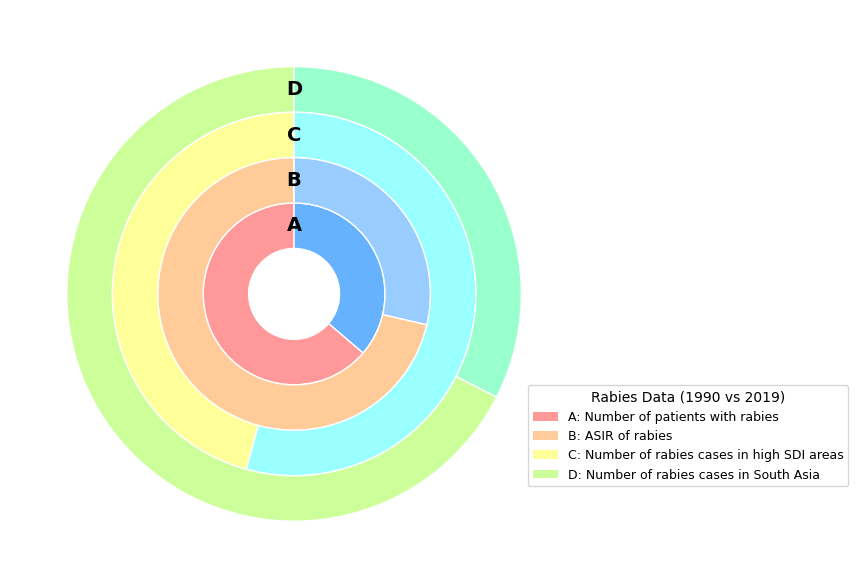

In [49]:
metrics = ['Number of patients with rabies', 'ASIR of rabies', 'Number of rabies cases in high SDI areas', 'Number of rabies cases in South Asia']
charts = ['A', 'B', 'C', 'D']
values_1990 = [24744.66, 45.99, 15.26, 15139.39]
values_2019 = [14075.51, 18.45, 18.08, 7287.84]

# Colors for the layers
colors_1990 = ['#FF9999', '#FFCC99', '#FFFF99', '#CCFF99']
colors_2019 = ['#66B2FF', '#99CCFF', '#99FFFF', '#99FFCC']

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(len(metrics)):
  inner_radius = 0.2 * (i + 1)
  outer_radius = inner_radius + 0.2
  ax.pie([values_1990[i], values_2019[i]], labels=None, startangle=90, colors=[colors_1990[i], colors_2019[i]],
         wedgeprops=dict(width=outer_radius-inner_radius, edgecolor='w'), radius=outer_radius)


for i, label in enumerate(charts):
  ax.text(0, i * 0.2 + 0.3, label, horizontalalignment='center', verticalalignment='center', fontsize=14, fontweight='bold')


legend_labels = [f'{chart}: {metric}' for chart, metric in zip(charts, metrics)]
legend_handles = [plt.Rectangle((0, 0), 1, 1, fc=color) for color in colors_1990]  # Using all colors for legend

legend = ax.legend(legend_handles, legend_labels, title='Rabies Data (1990 vs 2019)', loc='upper left', bbox_to_anchor=(0.9, 0.35), prop={'size': 9})  # Adjust font size and position

plt.tight_layout()
plt.show()


## **NOT PART OF ANALYSIS**

In [50]:
import matplotlib.pyplot as plt
import re
import pandas as pd

data = {
    "Age group": ["Global rabies-related DALYs",
                   "0-14 years", "15-49 years", "50-69 years", "70+ years"],
    "Rabies incidence in 1990": [1744232.42, 'Highest', 'Lower', 'Lower', 'Lowest'],
    "Rabies incidence in 2019": [782052.30, 'Similar', 'Similar', 'Slightly higher', 'Almost the same'],
    "Change from 1990 to 2019": [None, '38.9%',
                                  "Significant decrease", "Slight increase",
                                  "No significant change"]
}

# Function to estimate values based on descriptions (extract numerical value)
def estimate_value(description, known_values):
    percentage = None
    if "Highest" in description:
        return sum(known_values)  # Assuming total of known values represents global value
    elif "Similar" in description and len(known_values) > 1:
        return sum(known_values) / len(known_values)
    elif "Lower" in description and known_values[0] is not None:
        # Extract percentage from description (assuming format like "Significant decrease (XX.X%)")
        percentage_match = re.search(r"\d+\.\d+", description)  # Use regular expressions to extract numbers
        if percentage_match:
            percentage = float(percentage_match.group())
        return known_values[0] * (1 - percentage / 100) if percentage else known_values[0] * 0.75
    elif "Slightly higher" in description and known_values:
        return known_values[0] * 1.1
    elif "Almost the same" in description and known_values[0] is not None:
        return known_values[0] * 0.95
    else:
        return None  # No rule applies

for i in range(1, len(data)):
    age_group = data["Age group"][i]
    description = data["Change from 1990 to 2019"][i]
    known_values = [val for val in [data["Rabies incidence in 1990"][i],
                                    data["Rabies incidence in 2019"][i]] if val is not None]
    if description is not None:  # Skip estimation if no description provided
        estimated_value = estimate_value(description, known_values)
        if estimated_value:
            # Add estimated value to a new column named "Estimated Rabies Incidence"
            data["Estimated Rabies Incidence"] = data.get("Estimated Rabies Incidence", []) + [estimated_value]


df = pd.DataFrame(data)

print(df.to_string())

                     Age group Rabies incidence in 1990 Rabies incidence in 2019 Change from 1990 to 2019
0  Global rabies-related DALYs               1744232.42                 782052.3                     None
1                   0-14 years                  Highest                  Similar                    38.9%
2                  15-49 years                    Lower                  Similar     Significant decrease
3                  50-69 years                    Lower          Slightly higher          Slight increase
4                    70+ years                   Lowest          Almost the same    No significant change


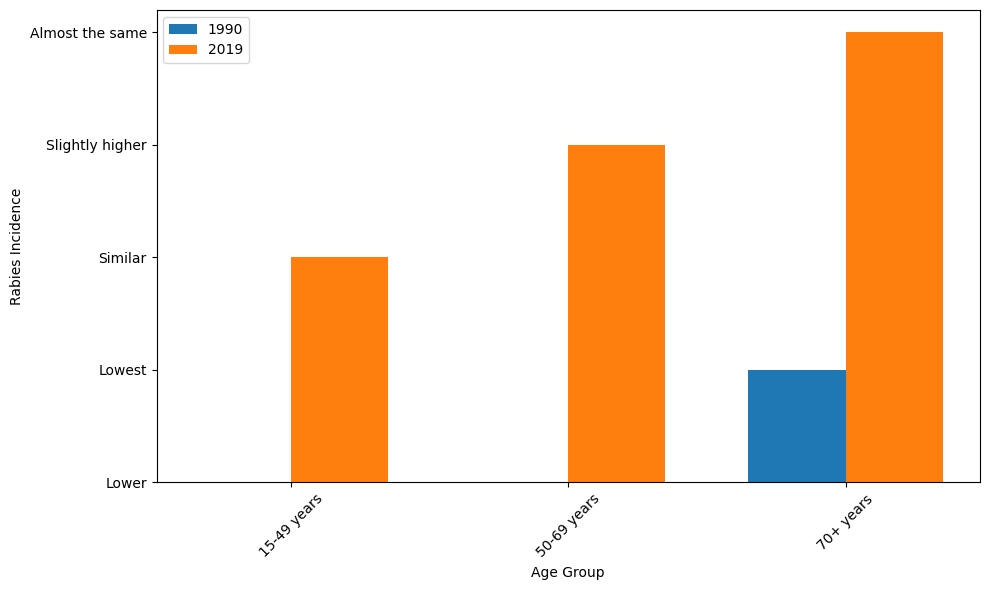

In [51]:
age_groups = data["Age group"][2:]  # Exclude descriptive text
rabies_1990 = [data["Rabies incidence in 1990"][i] if data["Rabies incidence in 1990"][i] is not None else 0
                for i in range(2, len(data["Age group"]))]
rabies_2019 = [data["Rabies incidence in 2019"][i] if data["Rabies incidence in 2019"][i] is not None else 0
                for i in range(2, len(data["Age group"]))]

# Ensure all data lists have the same length
min_length = min(len(age_groups), len(rabies_1990), len(rabies_2019))
age_groups = age_groups[:min_length]
rabies_1990 = rabies_1990[:min_length]
rabies_2019 = rabies_2019[:min_length]

# Create bar plot
width = 0.35
index = range(len(age_groups))

plt.figure(figsize=(10, 6))
plt.bar(index, rabies_1990, width, label='1990')
plt.bar([i + width for i in index], rabies_2019, width, label='2019')
plt.xlabel('Age Group')
plt.ylabel('Rabies Incidence')
plt.title

plt.xticks([i + width / 2 for i in index], age_groups, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()